### VIC data exploration
* June 12, 2017
* Source http://www.hydro.washington.edu/SurfaceWaterGroup/Data/vic_global.html
* Help: http://www.hydro.washington.edu/~jhamman/hydro-logic/blog/2013/10/12/plot-netcdf-data/

In [1]:
import sys, os
import pandas as pd
import netCDF4
#import arcpy
import numpy as np

In [2]:
#Plot
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [3]:
dataDir = "Data/Vic"

In [4]:
dataFN = os.path.join(dataDir,"vic.global.calibrated.1993.evap.nc")
dataFN = os.path.join(dataDir,'Evap.monthly.1950-2000.nc')
dataURL = 'ftp://ftp.hydro.washington.edu/pub/CE/HYDRO/nijssen/vic_global/calibrated/evap.calibrated.1993.nc.gz'

In [62]:
nc = netCDF4.Dataset(dataFN,mode='r')
evap = nc.variables['Evap']
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
times = nc.variables['time']
tstep = nc.variables['timestep']


In [63]:
#Grab data for single location
loni = -71.0625
lati = 52.6875

In [64]:
#Make masks of lat and long
latMask = (lat == lati)
lonMask = (lon == loni)
ptMask = (lat == lati) & (lon == loni)

print np.sum(ptMask) 

1


In [65]:
#Extract evap values with mask
e = evap[:,ptMask ]
hs = e[:,0]

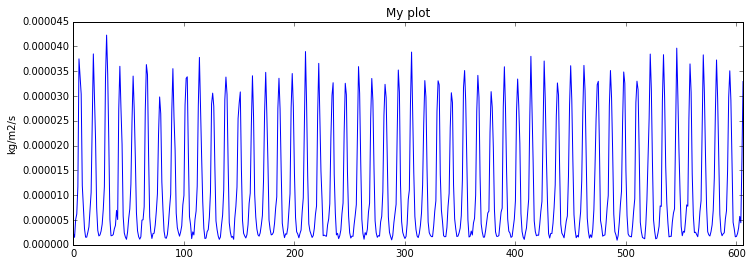

In [69]:
#Plot 
hs = pd.Series(e[:,0],index=times)
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
hs.plot(ax=ax,title='My plot')
ax.set_ylabel(evap.units)